# General Description:

For CRDM

Plotting choice as a function of the lottery amount, subdivded by lottery probabilities and ambuguity levels.

Importing libraries and mounting Google Drive

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os,sys


In [2]:
def count_tuples(listA):
  unique_items = list(set(listA))
  item_count = [listA.count(item) for item in unique_items]
  return unique_items,item_count

In [3]:
def tabulate_col(fn,df,col='crdm_sure_amt'):
    count_df = df[col].value_counts().sort_index()
    count_df = count_df.reset_index()
    print(count_df)
    #create .csv file with this info
    print("Saving to: {}".format(fn))
    count_df.to_csv(fn)

In [4]:
def count_lott_p_sure_amt_amb(fn_helper):
  df = pd.read_csv(fn_helper)
  #0's are now choosing immediate, 1 is choosing delay
  # df['crdm_trial_resp.corr'] = 1.0 - df['crdm_trial_resp.corr']
  # get unique amounts that are "task" trials

  for col in ['crdm_sure_amt','crdm_amb_lev','crdm_lott_p','crdm_lott_amt']:
    fn = os.path.join('csv','{}.csv'.format(col))
    tabulate_col(fn,df,col=col)


In [5]:
def get_subject(fn):
  subj = os.path.basename(fn).replace('_crdm.csv','')
  return subj

In [6]:
split_dir = '/Volumes/UCDN/datasets/NIDA/split/'
fn_helper = os.path.join(split_dir,'NIDA_002_v10/crdm/NIDA_002_v10_crdm.csv')
count_lott_p_sure_amt_amb(fn_helper)

   crdm_sure_amt  count
0           -5.0     71
1            5.0     76
Saving to: csv/crdm_sure_amt.csv
   crdm_amb_lev  count
0           0.0     94
1          24.0     19
2          50.0     18
3          74.0     16
Saving to: csv/crdm_amb_lev.csv
   crdm_lott_p  count
0         13.0     19
1         25.0     20
2         38.0     18
3         50.0     71
4         75.0     19
Saving to: csv/crdm_lott_p.csv
   crdm_lott_amt  count
0          -50.0     14
1          -40.0     15
2          -20.0     13
3           -8.0     15
4           -5.0     14
5            5.0     15
6            8.0     15
7           20.0     16
8           40.0     16
9           50.0     14
Saving to: csv/crdm_lott_amt.csv


Use the results from above to define upper and lower bounds and ylabels and titles

/Volumes/UCDN/datasets/NIDA/split/NIDA_002_v10/crdm/NIDA_002_v10_crdm.csv
Saving to: /Volumes/UCDN/datasets/NIDA/split/NIDA_002_v10/crdm/NIDA_002_v10_crdm_lottery_amt_choice.csv
Saving to: /Volumes/UCDN/datasets/NIDA/split/NIDA_002_v10/crdm/NIDA_002_v10_crdm_plot_lottery_amt_choice_losses.png


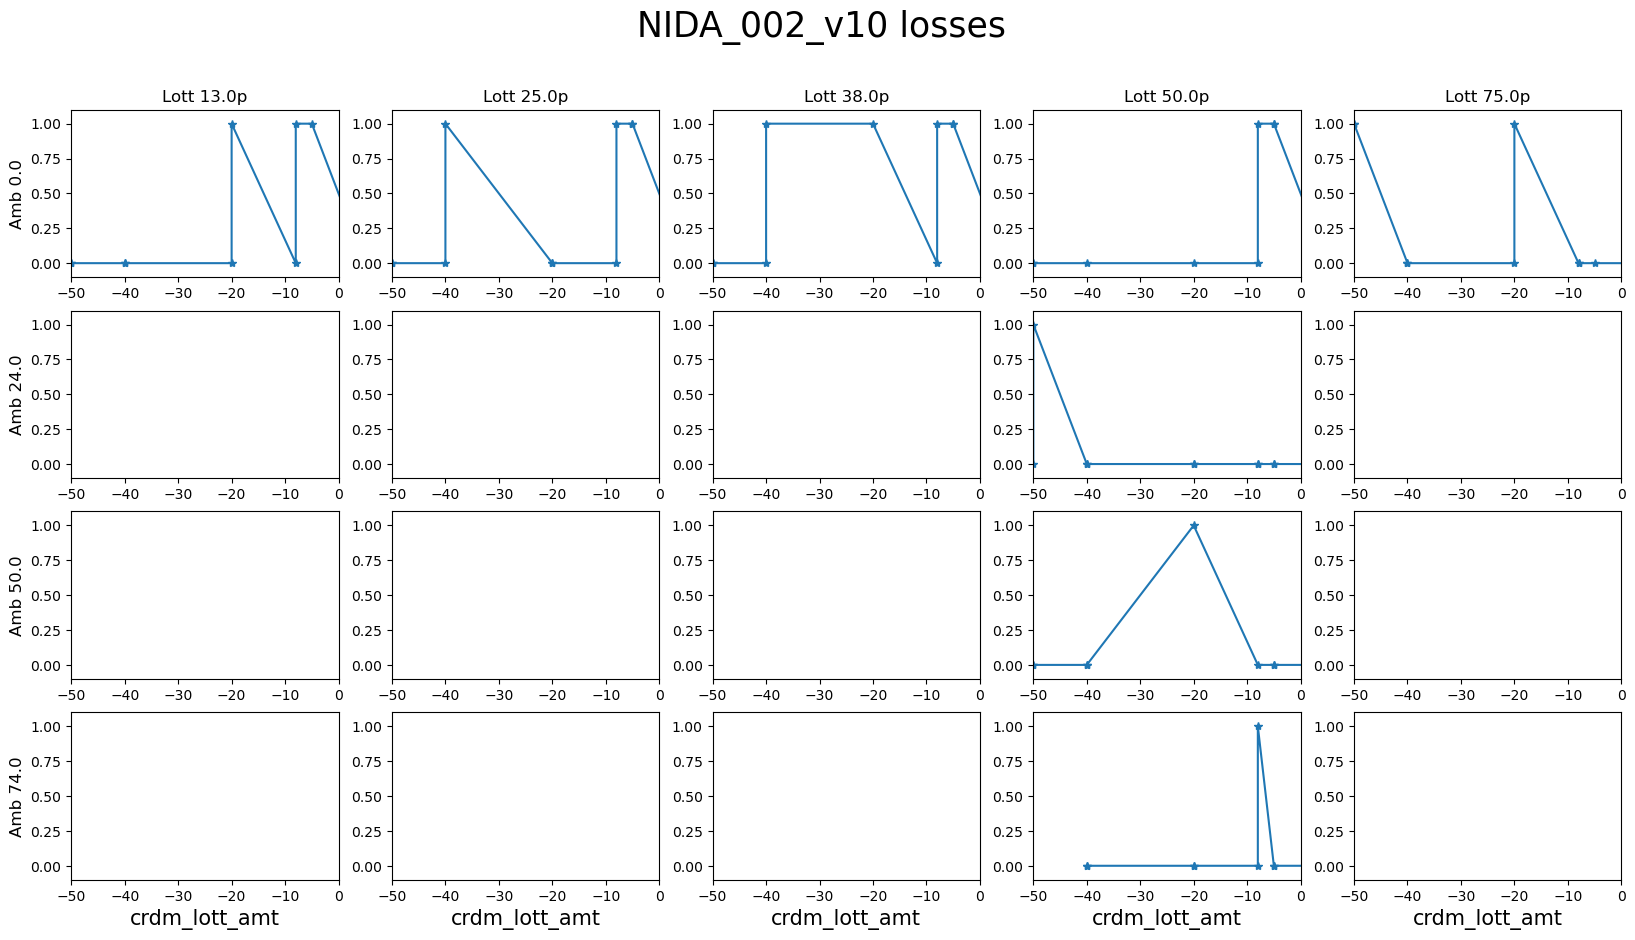

In [16]:
cols = ['crdm_amb_lev','crdm_sure_amt','crdm_lott_p','crdm_lott_amt']

# crdm_lott_p
xcol=cols[2]
# ambig lev
ycol=cols[0]

# ylabels = ['Immediate $2','Immediate $5', 'Immediate $15']
# titles = ['Delay Wait: Now', 'Delay Wait: 1 month','Delay Wait: 3 months','Delay Wait: 12 months','Delay Wait: 60 months']

xax = cols[3]
yax = 'crdm_choice'

# cols defined above
delay_amt_choice_df = pd.DataFrame(columns=['frequency','choice']+cols)

for i, subj_fn in enumerate([fn_helper]):
  print(subj_fn)
  df = pd.read_csv(subj_fn)
  ylabels = ['Amb 0.0','Amb 24.0', 'Amb 50.0', 'Amb 74.0']
  xtitle = ['Lott 13.0p', 'Lott 25.0p','Lott 38.0p','Lott 50.0p','Lott 75.0p']
  # ylabels = get_labels(df,col=ycol)
  # xtitle = get_labels(df,col=xcol)
  

  plt.figure(i,figsize=(20,10))
  xcol_vals = sorted(df[xcol].unique())
  ycol_vals = sorted(df[ycol].unique())
  index=0
  #loop through each delay-wait subgroup for each smaller sooner amount 
  for iy, yv in enumerate(ycol_vals):
    for ix, xv in enumerate(xcol_vals):
      # index = 1+iy+(len(xcol_vals)*ix)
      # print('({},{}) with ({},{}) and index: {}'.format(ix,iy,xv,yv,index))
      # print('title:{} ylabel: {}'.format(xtitle[ix],ylabels[iy]))
      index += 1
      plt.subplot(len(ycol_vals),len(xcol_vals),index)
      plt.ylim([-0.1,1.1])
      plt.xlim([df[xax].min(),0])
      # plt.xlim([0,df[xax].max()])
      if (ix == 0):
        plt.ylabel(ylabels[iy],fontsize=12)
      if (iy == 0):
        plt.title(xtitle[ix],fontsize=12)
      if (iy == len(ycol_vals)-1):
        plt.xlabel(xax,fontsize=15)
      
      x = []
      y = []
      #get dataframe with the appropriate smaller sooner and delay-wait time values
      idf = df.loc[(df[xcol] == xv) & (df[ycol] == yv)]
      if not len(idf):
        continue
      x = x + idf[xax].tolist()
      y = y + idf[yax].tolist()
      
      #used to fill .csv file for each participant's choices
      delay_amt_choice, count = count_tuples(list(zip(x,y)))
      this_df = pd.DataFrame(columns=cols)
      this_df["frequency"] = count
      this_df["choice"] = delay_amt_choice
      this_df[xcol] = xtitle[ix]
      this_df[ycol] = ylabels[iy]
      delay_amt_choice_df = pd.concat([delay_amt_choice_df,this_df],ignore_index=True)

      #sort by x and y in order to connect lines properly on final plots
      x,y = zip(*sorted(zip(x,y)))
      plt.plot(x,y,'*-')


  subj = get_subject(subj_fn)

  fn = os.path.join(split_dir,subj,'crdm/{}_crdm_lottery_amt_choice.csv'.format(subj))
  print("Saving to: {}".format(fn))
  delay_amt_choice_df.to_csv(fn)
  # print(delay_amt_choice_df)
  plt.suptitle('{} losses'.format(subj), fontsize=25)
  # plt.suptitle('{}: {} ${}'.format(subj,cols[3],df[cols[3]].unique().item()), fontsize=25)
  fig_fn = os.path.join(split_dir,subj,'crdm/{}_crdm_plot_lottery_amt_choice_losses.png'.format(subj))
  print("Saving to: {}".format(fig_fn))
  plt.savefig(fig_fn)
  plt.show()
  #sys.exit()